Chapter 01

# 可视化正球体
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学上展示了**单位球面在三维空间中的结构**以及**球面方向向量的彩色可视化**，使用的是极坐标到直角坐标的映射，并结合 HSV 色谱对方向进行编码。整段代码可拆为两个数学部分：一是球面构建与几何可视化，二是单位向量场的方向性彩色编码。

首先，我们通过两个角度变量来描述球面上的每一个点：经度角 $u$（从 $0$ 到 $2\pi$）与纬度角 $v$（从 $0$ 到 $\pi$）。通过张成二维网格 $\texttt{meshgrid}$，我们可以在参数空间 $[0, 2\pi] \times [0, \pi]$ 上定义一个规则网格，每个网格点 $(u_{ij}, v_{ij})$ 表示球面上的一个方向。

为了从这些角度构造出球面上的三维点，我们使用球坐标到笛卡尔坐标的转换公式：

$$
\begin{aligned}
x(u, v) &= r \cdot \cos(u) \cdot \sin(v) \\
y(u, v) &= r \cdot \sin(u) \cdot \sin(v) \\
z(u, v) &= r \cdot \cos(v)
\end{aligned}
$$

在这里我们取半径 $r = 1$，因此这些点 $(x, y, z)$ 就落在单位球面上，满足：

$$
x^2 + y^2 + z^2 = 1
$$

这部分对应于代码的“球面网格”可视化部分，用 `plot_wireframe()` 绘制球面经纬网格，展示了单位球面在三维空间中的几何结构。

第二部分是向量场的可视化，即从原点出发的单位向量，指向球面上的每一个方向 $(x_{ij}, y_{ij}, z_{ij})$。为了赋予这些箭头方向上的颜色感知，代码将经度角 $u$ 归一化为 $[0, 1]$ 区间，记作：

$$
u_{\text{norm}} = \frac{u}{2\pi}
$$

然后将 $u_{\text{norm}}$ 作为输入映射到 HSV 色谱中，使用 `matplotlib.cm.hsv` 这个色谱函数，它会将 $0$ 映射为红色，然后经过橙、黄、绿、蓝、紫最终回到红色，形成一个色环。也就是说，我们将球面上每个方向向量的颜色定义为它的经度角所对应的色调，从而在视觉上用颜色表示球面上的“方位”。

每一个箭头的起点是原点 $(0, 0, 0)$，终点是 $(x_{ij}, y_{ij}, z_{ij})$，它表示一个方向单位向量。在数学上，我们画出了如下向量集合：

$$
\vec{v}_{ij} = \begin{bmatrix}
x(u_{ij}, v_{ij}) \\
y(u_{ij}, v_{ij}) \\
z(u_{ij}, v_{ij})
\end{bmatrix}
\quad \text{其中 } \|\vec{v}_{ij}\| = 1
$$

这些向量构成了三维空间中的单位向量场，呈放射状从原点指向球面，颜色随着方向而变化。

总结来说，这段代码展示了如下数学结构：

1. 利用球坐标参数化构造单位球面；
2. 显示了球面上的方向单位向量；
3. 用 HSV 色谱编码方向的经度，实现视觉上的角度感知；
4. 从三维几何、向量分析与可视化技术多个层面融合了数学建模与直观图形表达。

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import hsv 

## 创建球面数据

In [6]:
u = np.linspace(0, 2 * np.pi, 37)  # 生成经度角
v = np.linspace(0, np.pi, 19)      # 生成纬度角
uu, vv = np.meshgrid(u, v)         # 生成网格
r = 1 # 球半径

# 计算球面坐标
xx = r*np.cos(uu) * np.sin(vv)
yy = r*np.sin(uu) * np.sin(vv)
zz = r*np.cos(vv)

## 可视化

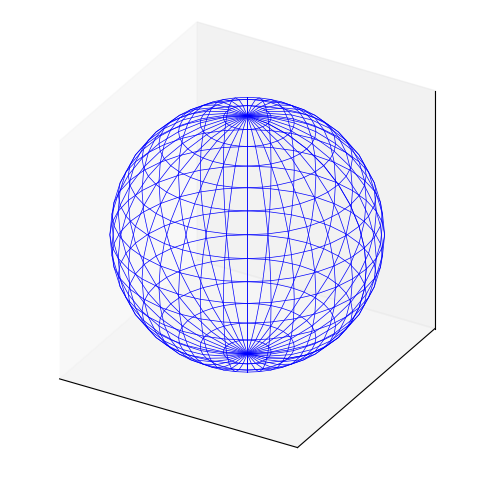

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# 绘制球面网格线
ax.plot_wireframe(xx, yy, zz, color='blue', linewidth=0.5)  # 只绘制网格边缘

# 设置坐标轴范围
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_aspect('equal', 'box')
ax.set_proj_type('ortho')

## 箭头图

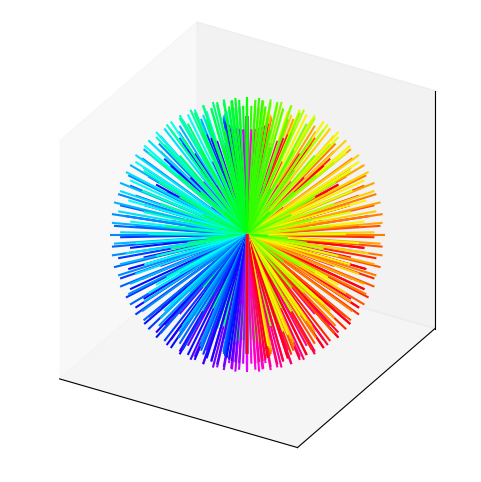

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# 归一化经度角 u 到 [0, 1] 范围
u_norm = uu.ravel() / (2 * np.pi)  # 与 hsv colormap 对应

# 获取 hsv colormap 对应的 RGB 颜色
colors = hsv(u_norm)  # 返回 RGBA 格式

zeros = np.zeros_like(xx.ravel())
# 绘制箭头图
ax.quiver(zeros, zeros, zeros,
          xx.ravel(), yy.ravel(), zz.ravel(), 
          color=colors, length=1, 
          normalize=True, arrow_length_ratio=0)

# 设置坐标轴范围
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_aspect('equal', 'box')
ax.set_proj_type('ortho')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  